In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from umap import UMAP
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [44]:
train_latents = pd.read_hdf("../../../data/experiments/image_embeddings/specific_targets/large_ensemble/train_latents.h5")
val_latents = pd.read_hdf("../../../data/experiments/image_embeddings/specific_targets/large_ensemble/val_latents.h5")
test_latents = pd.read_hdf("../../../data/experiments/image_embeddings/specific_targets/large_ensemble/test_latents.h5")

In [45]:
label_dict= {'AKT1': 0, 'AKT1S1': 1, 'ATF4': 2, 'ATG16L1': 3, 'ATG5': 4, 'BAMBI': 5, 'BAX': 6, 'BCL2L11': 7, 'BECN1': 8, 'BRAF': 9, 'CASP8': 10, 'CDC42': 11, 'CDK2': 12, 'CDKN1A': 13, 'CEBPA': 14, 'CREB1': 15, 'CSNK1E': 16, 'CXXC4': 17, 'DUSP1': 18, 'ELK1': 19, 'ERG': 20, 'GLI1': 21, 'HRAS': 22, 'IKBKB': 23, 'JAK2': 24, 'JUN': 25, 'KRAS': 26, 'MAP2K4': 27, 'MAP3K2': 28, 'MAP3K8': 29, 'MAP3K9': 30, 'MLST8': 31, 'PDPK1': 32, 'PRKACA': 33, 'RAF1': 34, 'RELB': 35, 'RHOA': 36, 'SMAD3': 37, 'SMAD4': 38, 'SMO': 39, 'SRC': 40, 'SREBF1': 41, 'TCF4': 42, 'TSC2': 43}
label_dict=dict(zip(list(label_dict.values()), list(label_dict.keys())))

In [47]:
def plot_embeddings_single_target(data, prefix, label_dict, label_col="labels"):
    tmp = data.copy()
    tmp.loc[:,label_col] = tmp.loc[:,label_col].map(label_dict)
    targets = sorted(np.unique(tmp.loc[:,label_col]))
    labels = np.array(tmp.loc[:, label_col])
    latents = np.array(tmp.loc[:, ~data.columns.isin([label_col])])
    
    zs = StandardScaler().fit_transform(latents)
    colors=["tab:red", "tab:gray"]
    
    embs = UMAP().fit_transform(zs)
    print(embs.shape)
    for i in range(len(targets)):
        target = targets[i]
        fig, ax = plt.subplots(figsize=[20,10])
        ax.scatter(embs[labels!=target, 0], embs[labels!=target, 1], c="tab:gray", alpha=0.01)
        ax.scatter(embs[labels==target, 0], embs[labels==target, 1], c="tab:red", alpha=0.5)
        ax.set_title("{} vs rest {} embeddings".format(target, prefix))
        plt.show()
        plt.close()

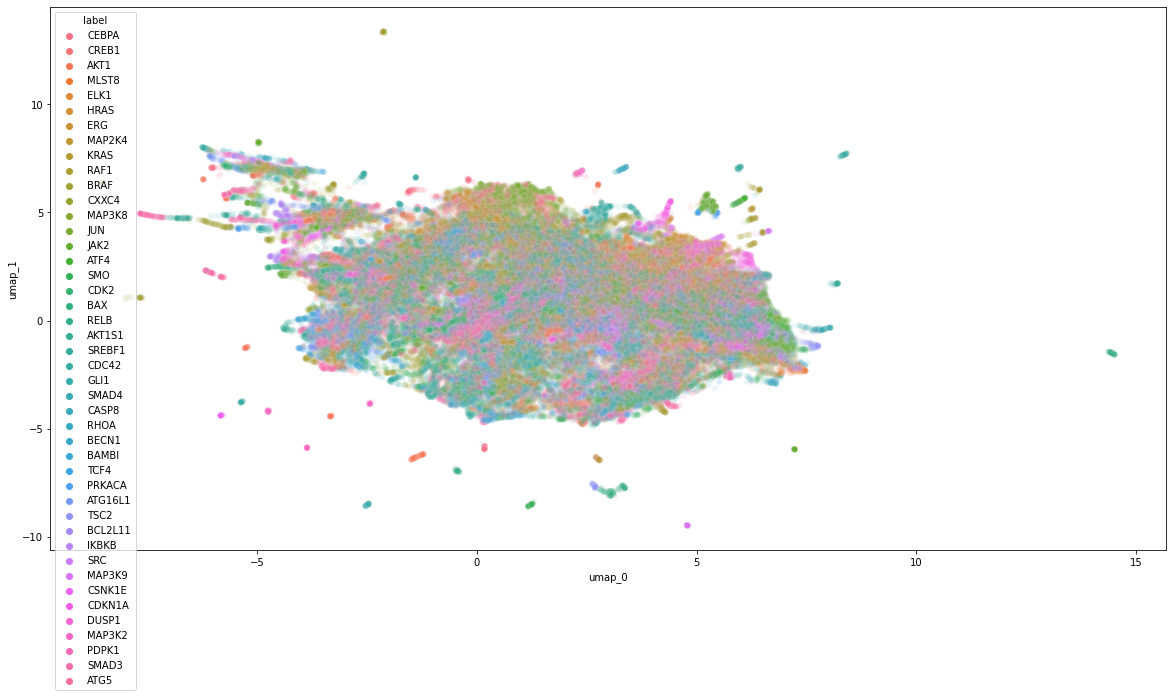

In [26]:
# train_latents.loc[:, "labels"] = train_latents.loc[:,"labels"].map(label_dict)
# latents = train_latents.iloc[:, :-1]
# labels = np.array(train_latents.iloc[:, -1])
# zs = StandardScaler().fit_transform(latents)
# embs = UMAP().fit_transform(zs)
# embs = pd.DataFrame(embs, columns=["umap_0", "umap_1"])
# embs["label"] = labels
# fig, ax = plt.subplots(figsize=[20,10])
# sns.scatterplot(data=embs, x="umap_0", y="umap_1", hue="label", ax=ax, alpha=0.1)
# plt.show()